# Religious Composition of Migration Flows

## Background: 

The period of 1990-2020 has seen a large uptick in international migration, prompted by a variety of factors ranging from economic advancement to regime instability. These flows are not just of people and their possessions, but also movements of culture and ideologies. Specifically, the religious composition of migration flows is of interest as religion is a facet of identity that significantly impacts social cohesion and identity preservation in both incoming and outgoing countries. In this project we wish to analyze the religious composition of migrants over the period of 1990-2020 to identify trends. 

## Dataset: 

We use a dataset compiled by Pew Research that can be found here: https://www.pewresearch.org/dataset/dataset-religious-composition-of-the-worlds-migrants-1990-2020/

While there are similar efforts to gather "stocks" of international migrants, this is the only dataset that compiles their religious composition  by drawing on census and survey data including the World Values Survey, the European Social Survey and Pew Research Center surveys. Migrant stock estimates are compiled from the UN Population Division which shows origin and destination countries of international migratns on an annual basis. A detailed explanation of the dataset methodology can be found here: https://www.pewresearch.org/religion/2024/08/19/religious-composition-migrants-methodology/#why-our-estimates-may-differ-from-other-sources

## Definitions: 

Migrant: The United Nations counts international migrants as people of any age who live outside their country (or in some cases, territory) of birth – regardless of their motives for migrating, their length of residence or their legal status.In addition to naturalized citizens and permanent residents, the UN’s international migrant numbers include asylum-seekers and refugees, as well as people without official residence documents. The UN also includes some people who live in a country temporarily – like some students and guest workers – but it does not include short-term visitors like tourists, nor does it typically include military forces deployed abroad. 

Stocks vs Flows: The analysis in this report focuses on existing stocks of international migrants – all people who now live outside their birth country, no matter when they left. We do not estimate migration flows – how many people move across borders in any single year..


In [5]:
import pandas as pd

# Path to the uploaded file
file_path = 'Incoming and Outgoing Migrant Counts.csv'

# Step 1: Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Step 2: Set the correct header row and remove unnecessary rows
df.columns = df.iloc[0]  # Set the first row as the header
df = df.iloc[1:]  # Remove the first row

# Step 3: Rename the columns for easier access
df.columns = ['Direction', 'Year', 'Country', 'Religion', 'Count', 'Percent', 'Region', 'Level', 'CountryCode']

# Step 4: Drop any completely empty rows
df = df.dropna(how='all')

# Step 5: Remove any rows where 'Year' or 'Country' is missing, as these are critical for analysis
df = df[df['Year'].notnull() & df['Country'].notnull()]

# Step 6: Clean the 'Count' column
# Extract only numeric characters from the 'Count' column
df['Count'] = df['Count'].replace('[^0-9.]', '', regex=True)  # Keep only numeric characters and dots
df['Count'] = pd.to_numeric(df['Count'], errors='coerce')  # Convert to float, setting non-numeric to NaN

# Step 7: Check for missing or invalid data in 'Count' column
if df['Count'].isnull().all():
    print("All values in the 'Count' column are invalid or missing. Please check the data.")
else:
    print("Data has been successfully loaded and cleaned.")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("Here's a preview of the first 5 rows of the cleaned data:")
    print(df.head())

Data has been successfully loaded and cleaned.
Number of rows: 26712
Number of columns: 9
Here's a preview of the first 5 rows of the cleaned data:
  Direction  Year       Country   Religion      Count Percent  Region Level  \
1  Incoming  1990  Global Total        All  152970000   100.0  Global     3   
2  Incoming  1990  Global Total   Buddhist    4590000     3.0  Global     3   
3  Incoming  1990  Global Total  Christian   72710000    47.5  Global     3   
4  Incoming  1990  Global Total      Hindu    9130000     6.0  Global     3   
5  Incoming  1990  Global Total        Jew    2340000     1.5  Global     3   

  CountryCode  
1        9999  
2        9999  
3        9999  
4        9999  
5        9999  


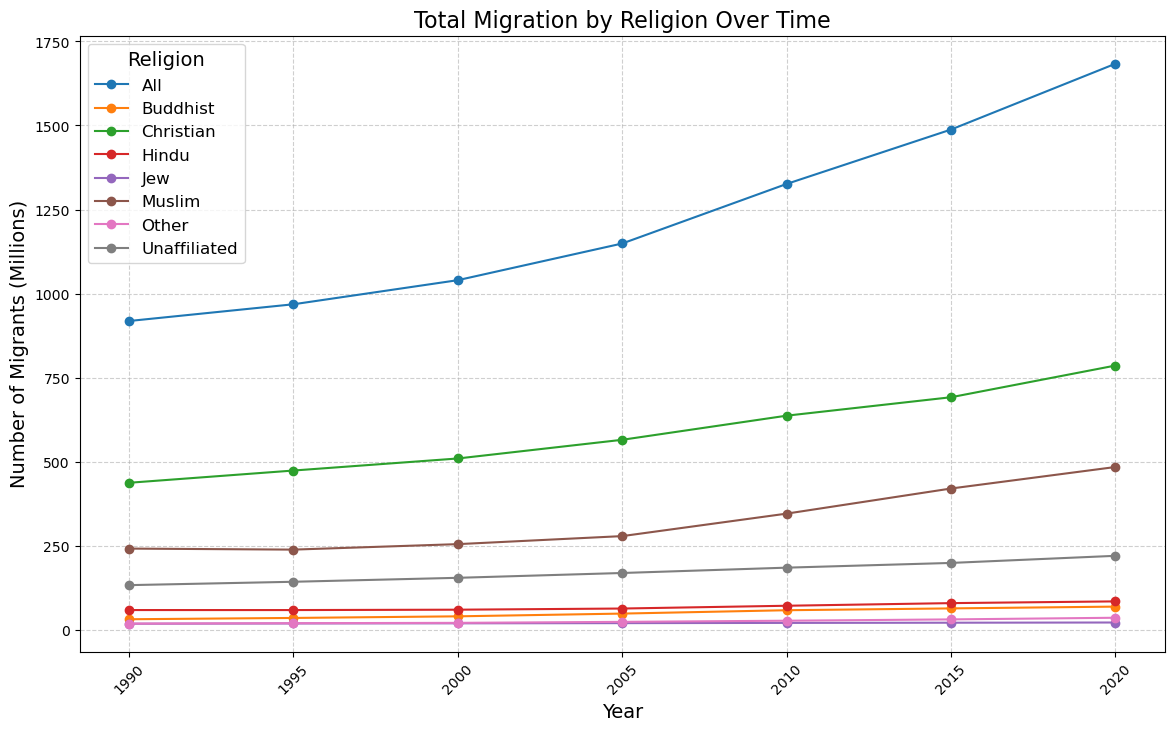

In [41]:
import matplotlib.pyplot as plt
import mplcursors
from matplotlib.cm import tab10
from matplotlib.ticker import MaxNLocator

# Aggregate total migration counts per year and religion
yearly_migration = df.groupby(['Year', 'Religion'])['Count'].sum().reset_index()

# Calculate year-over-year growth rates
yearly_migration['Growth Rate'] = yearly_migration.groupby('Religion')['Count'].pct_change() * 100

# Convert Count to millions
yearly_migration['Count'] = yearly_migration['Count'] / 1_000_000

# Initialize the plot
plt.figure(figsize=(14, 8))

# Generate a color palette
colors = plt.cm.tab10(range(len(yearly_migration['Religion'].unique())))

# Plot data for each religion
for idx, religion in enumerate(yearly_migration['Religion'].unique()):
    subset = yearly_migration[yearly_migration['Religion'] == religion]
    plt.plot(
        subset['Year'], subset['Count'], 
        marker='o', label=religion, color=colors[idx]
    )

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Add titles and labels
plt.title('Total Migration by Religion Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Migrants (Millions)', fontsize=14)

# Add a legend
plt.legend(title='Religion', fontsize=12, title_fontsize=14)

# Adjust x-axis ticks and ensure integer labels
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Highlight the maximum point with an annotation
max_value = yearly_migration['Count'].max()
max_row = yearly_migration[yearly_migration['Count'] == max_value]
max_year = int(max_row['Year'].values[0])
max_religion = max_row['Religion'].values[0]
plt.annotate(
    f'Max: {max_value:.1f}M ({max_religion})',
    xy=(max_year, max_value),
    xytext=(max_year - 5, max_value + 5),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=12
)

# Add interactivity with mplcursors
mplcursors.cursor(hover=True)

# Save the plot
plt.savefig('migration_by_religion.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

We can see that overall migration has increased in absolute numbers by 80% between 1990-2020 but much of the growth comes from migrations of Christians and Muslims, compared to other religious groups. An alternate view would be to compare migration growth rates across different religions as seen below. 

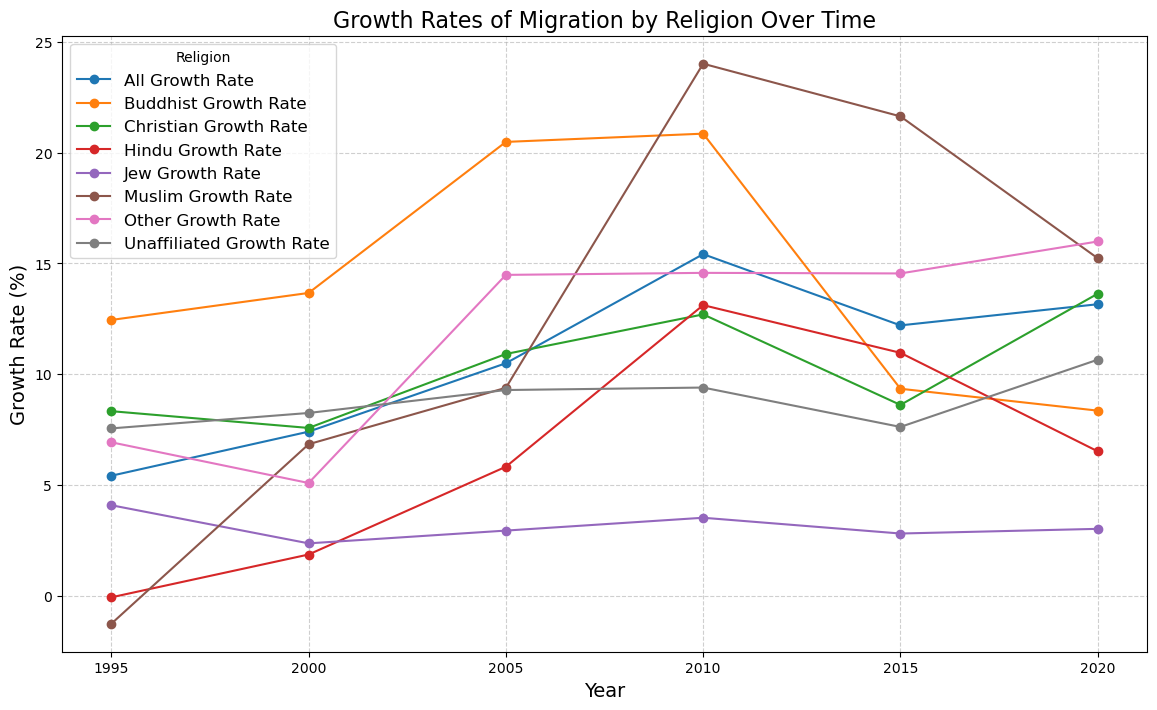

In [39]:
plt.figure(figsize=(14, 8))
for idx, religion in enumerate(yearly_migration['Religion'].unique()):
    subset = yearly_migration[yearly_migration['Religion'] == religion]
    plt.plot(subset['Year'], subset['Growth Rate'], marker='o', label=f"{religion} Growth Rate", color=colors[idx])

plt.title('Growth Rates of Migration by Religion Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Growth Rate (%)', fontsize=14)
plt.legend(title='Religion', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

When looking at growth rates, a striking result is the spike of the Muslim migration growth rate which sharply spiked in 2010 - presumably due to political upheaval from the Arab Spring which caused widespread displacement and refugee upticks. To examine the specific direction of these flows, we select for Muslim religion and the year 2015 (assuming movements take some time to respond to political shocks) to get more granular insights

As suspected, the top outgoing countries include Syria, Afghanistan and Palestine which were all areas affected by war and conflict between 2010-2015. Interestingly, India and Pakistan also make this list though this can be understood as a reflection of the high number of overall migration from these countries which include a large number of Muslims. 

We find that the top incoming destinations for Muslim migrants include Jordan, Turkey and USA, which makes sense given the refugee intake programs in these nations. 

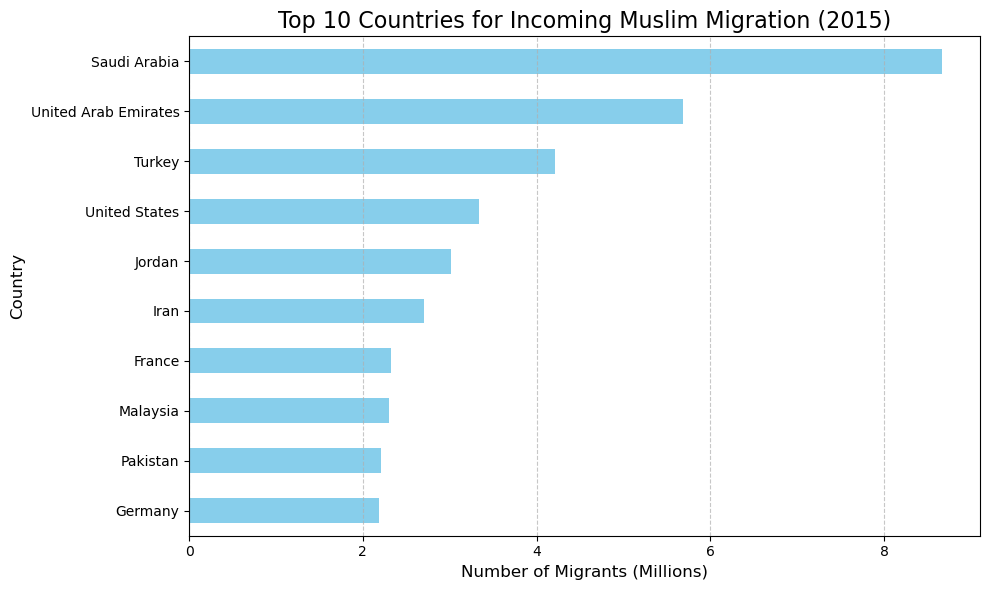

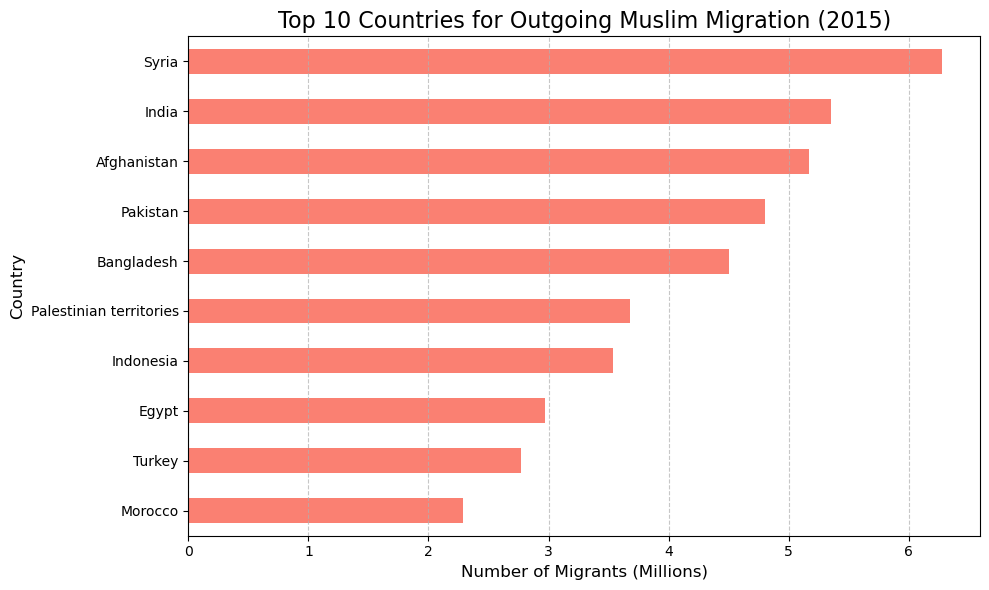

In [56]:
# Filter data for Muslims in the year 2010
muslims_2015 = df[
    (df['Year'] == '2015') & 
    (df['Religion'] == 'Muslim')
]

# Separate incoming and outgoing data
incoming_data = muslims_2015[muslims_2015['Direction'] == 'Incoming']
outgoing_data = muslims_2015[muslims_2015['Direction'] == 'Outgoing']

# Remove unnecessary rows (e.g., global totals or regions)
incoming_data = incoming_data[
    ~incoming_data['Country'].str.startswith('All') &
    (incoming_data['Country'] != 'Global Total')
]
outgoing_data = outgoing_data[
    ~outgoing_data['Country'].str.startswith('All') &
    (outgoing_data['Country'] != 'Global Total')
]

# Aggregate and get top 10 countries for each direction
top_incoming = incoming_data.groupby('Country')['Count'].sum().nlargest(10)
top_outgoing = outgoing_data.groupby('Country')['Count'].sum().nlargest(10)

# Convert counts to millions for readability
top_incoming = top_incoming / 1_000_000
top_outgoing = top_outgoing / 1_000_000

# Plot incoming migration
plt.figure(figsize=(10, 6))
top_incoming.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries for Incoming Muslim Migration (2015)', fontsize=16)
plt.xlabel('Number of Migrants (Millions)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot outgoing migration
plt.figure(figsize=(10, 6))
top_outgoing.sort_values().plot(kind='barh', color='salmon')
plt.title('Top 10 Countries for Outgoing Muslim Migration (2015)', fontsize=16)
plt.xlabel('Number of Migrants (Millions)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Continuing the analysis, we run the same test for other religions across top incoming and outgoing destinations to see if there are any further insights.

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pycountry

# Function to plot top 10 countries as bar charts
def plot_top_countries(df, years, direction, religion):
    """
    Plots the top 10 countries for migration based on direction and religion.
    Tries multiple years if no data is found for the preferred year.
    """
    for year in years:
        top_countries = df[
            (df['Direction'] == direction) &
            (df['Year'] == str(year)) &
            (df['Religion'] == religion)
        ]

        top_countries = top_countries[
            ~top_countries['Country'].str.startswith('All') & 
            (top_countries['Country'] != 'Global Total')
        ]

        if not top_countries.empty:
            top_10_countries = top_countries.groupby('Country')['Count'].sum().nlargest(10)

            if not top_10_countries.empty:
                top_10_countries = top_10_countries / 1_000_000  # Convert to millions
                top_10_countries = top_10_countries.sort_values(ascending=True)

                fig, ax = plt.subplots(figsize=(8, 6))
                top_10_countries.plot(kind='barh', color='cornflowerblue', ax=ax)
                plt.title(f'Top 10 Countries for {religion} {direction} Migration in {year}')
                plt.xlabel('Number of Migrants (Millions)')
                plt.ylabel('Country')
                plt.show()
                return  # Exit after successfully plotting
    print(f"No data available for {religion} {direction} migration in {years}.")

# Function to plot migration trends on a world map
def plot_migration_map(df, years, direction, religion, shapefile_path):
    """
    Plots migration data on a world map using GeoPandas.
    Tries multiple years if no data is found for the preferred year.
    """
    for year in years:
        migration_data = df[
            (df['Direction'] == direction) &
            (df['Year'] == str(year)) &
            (df['Religion'] == religion)
        ]

        migration_data = migration_data[
            ~migration_data['Country'].str.startswith('All') & 
            (migration_data['Country'] != 'Global Total')
        ]

        migration_data = migration_data.groupby('Country')['Count'].sum().reset_index()

        if not migration_data.empty:
            def get_country_code(name):
                try:
                    return pycountry.countries.lookup(name).alpha_3
                except:
                    return None

            migration_data['ISO_A3'] = migration_data['Country'].apply(get_country_code)
            migration_data = migration_data.dropna(subset=['ISO_A3'])

            world = gpd.read_file(shapefile_path)
            world = world.merge(migration_data, left_on='ADM0_A3', right_on='ISO_A3', how='left')

            # Convert Counts to Millions
            world['Count'] = world['Count'] / 1_000_000  # Convert to millions

            fig, ax = plt.subplots(1, 1, figsize=(15, 10))
            world.boundary.plot(ax=ax, linewidth=1, color="gray")  # Country boundaries
            world.plot(column='Count', cmap='Blues', legend=True, ax=ax, 
                       legend_kwds={'label': "Number of Migrants (Millions)"},
                       missing_kwds={"color": "lightgrey", "label": "No data"})

            plt.title(f'{direction} Migration for {religion} Migrants in {year}', fontsize=15)
            plt.axis('off')
            plt.show()
            return  # Exit after successfully plotting
    print(f"No data available for {religion} {direction} migration in {years}.")

# Main Script
primary_year = 2020
backup_years = [2018, 2015, 2010, 2005]  # Backup years to try if no data is available
all_years = [primary_year] + backup_years  # List of years to try

shapefile_path = 'ne_110m_admin_0_countries.shp'

# List of religions to visualize (Jewish has been removed)
religions = ['Buddhist', 'Christian', 'Hindu', 'Muslim']

# Loop through each religion and visualize incoming and outgoing migration
for religion_of_interest in religions:
    # Incoming Migration
    plot_top_countries(df, all_years, 'Incoming', religion_of_interest)
    plot_migration_map(df, all_years, 'Incoming', religion_of_interest, shapefile_path)

    # Outgoing Migration
    plot_top_countries(df, all_years, 'Outgoing', religion_of_interest)
    plot_migration_map(df, all_years, 'Outgoing', religion_of_interest, shapefile_path)

NameError: name 'df' is not defined

Looking at Buddhist migrations in 2020, we note that there seems to be a net movement from Myanmar, China and Vietnam towards Thailand, US and Singapore. Geographically, the Southeast Asian flows make sense since Myanmar and Thailand and Vietnam share borders and there have been increased flows towards Thailand in search of economic opportunity, as with Singapore.

Next, we look at the overall migration patterns between countries in the form of heatmap for a zoomed out picture of the movements across the entire time period 1990-2020: 

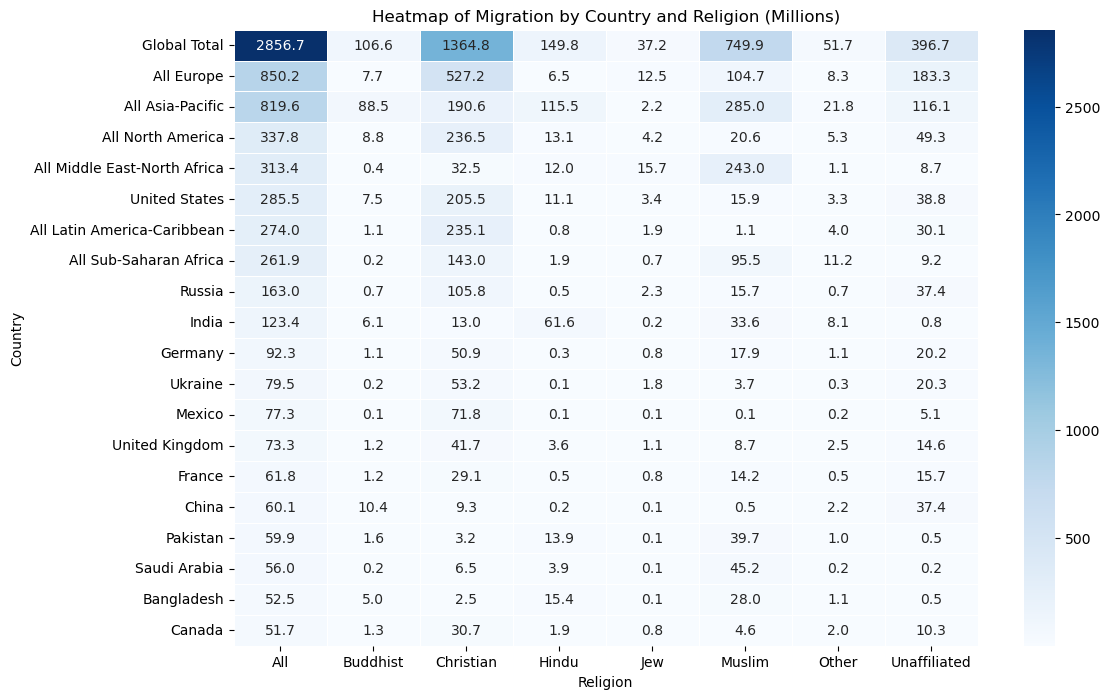

In [97]:
import seaborn as sns

# Create a pivot table of migration counts by religion and country
pivot_table = df.pivot_table(index='Country', columns='Religion', values='Count', aggfunc='sum').fillna(0)
pivot_table = pivot_table / 1_000_000  # Convert to millions

# Filter top 20 countries by total migration
top_20_countries = pivot_table.sum(axis=1).nlargest(20).index
pivot_table = pivot_table.loc[top_20_countries]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Migration by Country and Religion (Millions)')
plt.ylabel('Country')
plt.xlabel('Religion')
plt.show()

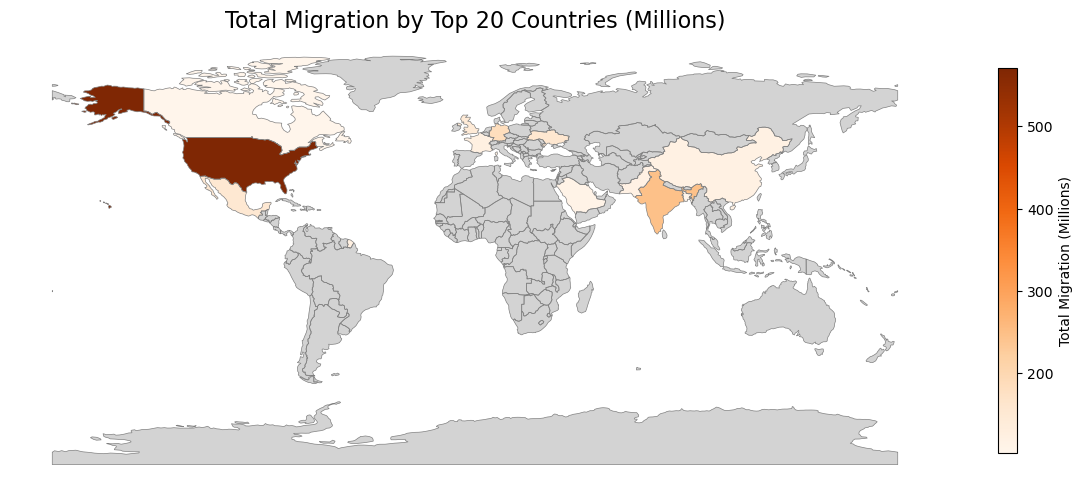

In [111]:
shapefile_path = 'ne_110m_admin_0_countries.shp'
  
# Prepare migration data
pivot_table = df.pivot_table(index='Country', columns='Religion', values='Count', aggfunc='sum').fillna(0)
pivot_table = pivot_table / 1_000_000  # Convert to millions

# Filter top 20 countries by total migration
top_20_countries = pivot_table.sum(axis=1).nlargest(20).index
migration_data = pivot_table.loc[top_20_countries].sum(axis=1).reset_index()
migration_data.columns = ['Country', 'Total_Migration']

# Ensure it's a fresh copy of the data (avoiding SettingWithCopyWarning)
migration_data = migration_data.copy()

# Function to get ISO codes for country names
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

# Add ISO_A3 codes safely using .loc
migration_data.loc[:, 'ISO_A3'] = migration_data['Country'].apply(get_country_code)

# Drop rows with missing ISO codes
migration_data = migration_data.dropna(subset=['ISO_A3'])

# Add ISO_A3 codes to the migration data
migration_data['ISO_A3'] = migration_data['Country'].apply(get_country_code)
migration_data = migration_data.dropna(subset=['ISO_A3'])

world = gpd.read_file(shapefile_path)
world = world.merge(migration_data, left_on='ADM0_A3', right_on='ISO_A3', how='left')


# Plot the world map for top 20 countries
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=0.5, color="gray")  # Country boundaries
world.plot(column='Total_Migration', cmap='Oranges', linewidth=0.5, ax=ax,
               legend=True, missing_kwds={'color': 'lightgrey', 'label': 'No data'},
               legend_kwds={'label': "Total Migration (Millions)", 'shrink': 0.5})

# Add title and styling
plt.title('Total Migration by Top 20 Countries (Millions)', fontsize=16)
plt.axis('off')  
plt.show()

The graphic above has regions greyed out due to mapping issues between Natural Earth's country name specifications versus our raw data. A refined version of this would have us map out each of the countries with the help of a dictionary to have a fully color-scaled map. 

Images for 1990, 2000, 2010, and 2020 have been created and saved.


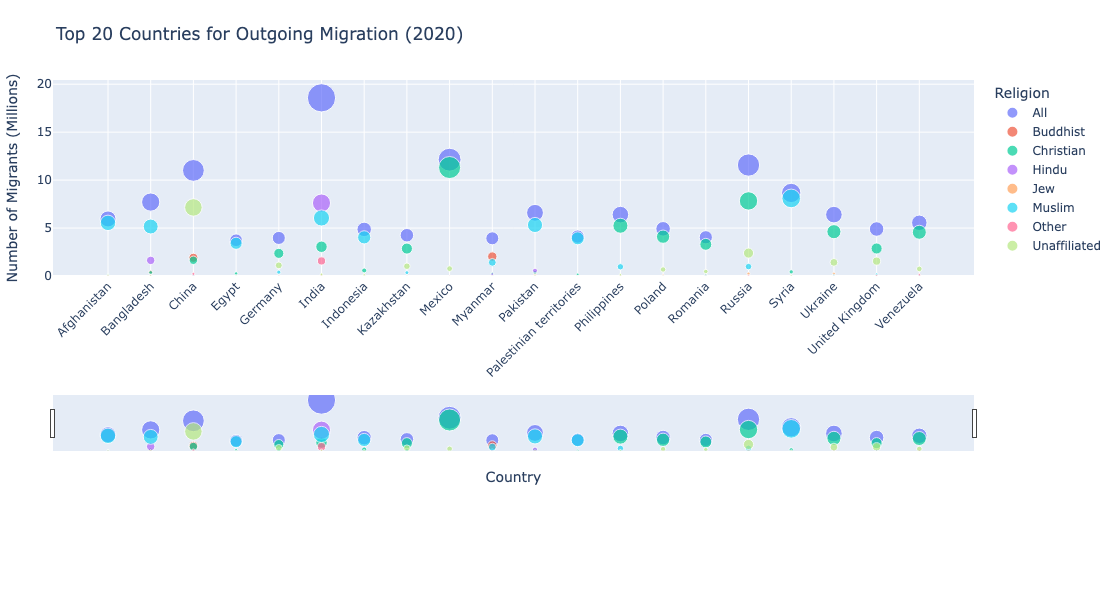

In [17]:

import plotly.express as px

# Define the years to visualize
years = [1990, 2000, 2010, 2020]

# Loop through each year and generate the scatter plot
for year in years:
    # Filter for outgoing migration data for the current year
    scatter_data = df[
        (df['Direction'] == 'Outgoing') & 
        (df['Year'] == str(year))
    ]

    # Exclude rows with "Global Total" or aggregated categories
    scatter_data = scatter_data[~scatter_data['Country'].str.contains("Global|All", case=False)]

    # Group by country and religion, and sum the counts
    scatter_summary = scatter_data.groupby(['Country', 'Religion'])['Count'].sum().reset_index()

    # Sort countries by total count and keep top 20
    top_countries = scatter_summary.groupby('Country')['Count'].sum().nlargest(20).index
    scatter_summary = scatter_summary[scatter_summary['Country'].isin(top_countries)]

    # Convert counts to millions for easier readability
    scatter_summary['Count'] = scatter_summary['Count'] / 1_000_000

    # Create the scatter plot
    fig = px.scatter(
        scatter_summary, 
        x="Country", 
        y="Count", 
        color="Religion",
        size="Count", 
        title=f"Top 20 Countries for Outgoing Migration ({year})", 
        labels={"Count": "Number of Migrants (Millions)", "Country": "Country"},
        template="plotly",
        hover_data=["Religion", "Count"]
    )

    # Update layout to make the x-axis scrollable
    fig.update_layout(
        width=1200,  # Figure width
        height=600,  # Figure height
        xaxis=dict(
            tickangle=-45,
            title="Country",
            title_standoff=10,
            showgrid=True,
            rangeslider=dict(visible=True),  # Add scrollable range slider
            fixedrange=False
        ),
        yaxis=dict(
            title="Number of Migrants (Millions)",
            range=[0, scatter_summary['Count'].max() * 1.1]
        ),
        margin=dict(l=40, r=40, t=80, b=150)  # Add margins
    )

    # Save the plot as an image for the current year
    fig.write_image(f"outgoing_migration_{year}.png")

# Print message when done
print("Images for 1990, 2000, 2010, and 2020 have been created and saved.")
fig.show()

To compare this graphic over the years, we use imageio to create a gif that can be played by running the code below: 

In [25]:
import imageio
import os

# Define the years to plot
years = [1990, 2000,2005, 2010,2015,2020]

# Ensure Year column is clean
df['Year'] = df['Year'].astype(str).str.strip()

# Directory to save images
output_dir = "migration_images"
os.makedirs(output_dir, exist_ok=True)

# Generate images for each year
image_files = []
for year in years:
    scatter_data = df[
        (df['Direction'] == 'Outgoing') & 
        (df['Year'] == str(year))
    ]
    scatter_data = scatter_data[~scatter_data['Country'].str.contains("Global|All", case=False)]
    scatter_summary = scatter_data.groupby(['Country', 'Religion'])['Count'].sum().reset_index()
    top_countries = scatter_summary.groupby('Country')['Count'].sum().nlargest(20).index
    scatter_summary = scatter_summary[scatter_summary['Country'].isin(top_countries)]
    scatter_summary['Count'] = scatter_summary['Count'] / 1_000_000

    # Create the scatter plot
    fig = px.scatter(
        scatter_summary, 
        x="Country", 
        y="Count", 
        color="Religion",
        size="Count", 
        title=f"Top 20 Countries for Outgoing Migration ({year})", 
        labels={"Count": "Number of Migrants (Millions)", "Country": "Country"},
        template="plotly",
        hover_data=["Religion", "Count"]
    )
    
    # Save the image
    image_path = os.path.join(output_dir, f"scatter_migration_{year}.png")
    fig.write_image(image_path)
    image_files.append(image_path)

# Combine images into a GIF with lower FPS
output_gif = "migration_timelapse_slow.gif"
fps = 0.5  # Play 1 frame every 2 seconds (slower playback)
with imageio.get_writer(output_gif, mode='I', fps=fps) as writer:
    for image_file in image_files:
        writer.append_data(imageio.imread(image_file))

print(f"Timelapse GIF saved as: {output_gif}")

Timelapse GIF saved as: migration_timelapse_slow.gif


/var/folders/kt/z8mhw7kn6cj5xqn6_v48hft00000gn/T/ipykernel_88739/1432102380.py:50: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



When we look at the flows across the entire time period with the gif above, another result that stands out is that the total stock of Hindu migrants from India living around the world increased from 9.1 million in 1990 to 13.5 million in 2020 (up 48%).  While Hindus have  made up between 5% and 6% of the international migrant population during these decades, their regional patterns have changed considerably. In 1990,over 80% of Hindu immigrants moved within Asia-Pacific, but we see major upticks in movements of Hindus from India to the Middle East between 2000-2020. Specifically, the GCC countries of Qatar, UAE and Saudi Arabia see big increases, as well as North America. 
